# 1 sklearn 建模流程 

In [57]:
from sklearn import tree #导入需要的模块
clf = tree.DecisionTreeClassifier#实例化，建立模型评估对象
clf = clf.fit(x_train,y_train)#通过模型接口fit训练模型，用训练数据集训练模型
result = clf.score(X_test,Y_test) #通过模型接口score提取信息，导入测试集用接口调用需要的信息

NameError: name 'x_train' is not defined

建立一棵树
1. 导入需要的算法库和模块

In [58]:
from sklearn import tree
from sklearn.datasets import load_wine #红酒数据
from sklearn.model_selection import train_test_split #分数据集工具

2. 探索数据集

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data.shape#178个sample13个特征

wine.target.shape#178个标签，一维

(178,)

In [4]:
#如果wine是一个dataframe应该长这样
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
#记忆点：concat的使用方式
    # concat 拼接有两种方式：inner（交集），outer（并集）
    #pd.concat([df3,df4],axis=1,join='inner')#普通的堆叠操作，横向和纵向
    #pd.concat([df3,df4],axis=0,join='outer')#在行方向上拼接，没有数据使用NaN填充

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


3. 分训练集和测试集 

In [5]:
#X_train,Y_train,X_test,Y_test = train_test_split(wine.data,wine.target,test_size = 0.3) 报错 Unknown label type: 'continuous-multioutput'！顺序错了
#知识点！顺序是X,X,Y,Y!!!1
X_train,X_test,Y_train,Y_test = train_test_split(wine.data,wine.target,test_size = 0.3) 
X_train.shape
Y_train

array([0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2])

4. 建立模型

In [6]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train,Y_train)
score= clf.score(X_test,Y_test) 

score

0.8703703703703703

5. 画出一棵树吧

In [14]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
#用tree里的export_graphviz接口导出画图数据
import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name 
                                ,class_names=["琴酒","雪莉","贝尔摩德"] 
                                ,filled=True
                                ,rounded=True
                                )

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

6. 探索重要性

In [11]:
#特征的重要性
clf.feature_importances_

[*zip(feature_name,clf.feature_importances_,)]


[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.031102025813180268),
 ('镁', 0.06186415594397251),
 ('总酚', 0.12523576964837985),
 ('类黄酮', 0.057504510252104395),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.0),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.2757576410480595),
 ('脯氨酸', 0.4485358972943035)]

## 2.1 重要参数

In [32]:
pip install graphviz

Looking in indexes: https://bytedpypi.byted.org/simple/
Note: you may need to restart the kernel to use updated packages.


### 2.1.1 criterion  衡量不纯度的指标
entropy:信息熵，计算更缓慢一些，涉及log,决策树生长会更加精细，对于高维数据可能容易过拟合   
gini(defult):基尼系数

### 2.1.2 ramdom_state & spliter

**为什么要集成算法？**   
因为不能保证每次是最优，每一次的节点模型学习都是随机的，集成学习的思路就是建立更多不同的树，从中选取最好的来实现优化的效果   
每次分支时不使用全部特征，而是随机选取**一部分特征**，从中选取不纯度最优的作为分支用的节点，这样每次生成的树就不同了

**ramdom_state***   
默认none,输入一个int后，模型会确定随机数种子，每次生成同样的树，让模型稳定下来   
**splitter***   
用来控制决策树中的随机选项，有两种输入值【best,random】;best会在分支时优选更重要的特征进行分支，random：在分支时会更加随机，树会因为输入一些不必要的信息而更深更大，并因这种不重要的信息降低对训练集的拟合，这也是方式过拟合的一种方式；   
不过当树建成，我们主要采用剪枝参数来防止过拟合   


In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

### 2.1.3 剪枝参数
在不加限制的情况下，一棵树会生长到衡量不纯度的指标最优，或者没有更多可用的特征为止，这个时候，决策树往往过拟合。即：在训练集上表现很好，但是在测试集上很糟糕。**因为我们收集的样本数据必然会包含一些噪声，不是100%代表性的样本，当模型对这种数据解释度很高时，必然是会受到噪声的影响，使它对未知数据的拟合程度不足。**   
正确的剪枝策略是决策树算法的核心，sklearn 为我们提供了不同的剪枝策略：   
**max_depth**   
限制树的最大深度，决策树没生成一层对样本量的需求就会增加一倍，这个策略在高维低样本量时非常有效，所以限制深度能够有效的限制过拟合；一般建议从=3开始尝试，看看拟合的效果再决定是否增加设定深度；   

**min_samples_leaf**   
限定一个节点在分之后的每个子节点都必须至少包含n个样本，即n=2时，当节点下的子节点仅有1个样本量时（过少的样本量往往可能会导致学习依据不足，学习到了噪声而过拟合），这个节点的分支就不会发生；
· 一般搭配max_depth使用会有神奇的效果，可以让模型变得更平滑；   
· 这个参数设置的太小则不会起到防止过拟合的效果，**回归树中**，一般建议从 =5开始使用; 如果样本中含有的数据量比较大， 建议输入浮点数，作为样本百分比来使用；这个参数可以保证叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的的**分类问题**，=1通常就是最佳选择；


**min_samples_split**
限制一个节点必须要包含N个训练样本，这个节点才允许被分支，否则分支就不会发生；同样也是限制过拟合分支的产生   

**max_features**   
一般结合max_depth使用，限制分支时考虑的特征个数，超过限制个数的特征都会被舍弃；在不知道决策树中各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足，如果希望通过降维的方式防止过拟合，建议使用PCA ICA或者特征选择模块中的降维算法；  


**min_impurity_decrease**
限制信息增益的代销，信息增益小于设定数值的分支不会发生，这是0.19版本后的功能，在此之前是 min_impurity_split   

**如何确定最优的剪枝参数**   
超参数曲线：是一条以超参数取值为横坐标，模型的度量指标为纵坐标的曲线，它是用来衡量不同超参数去之下模型表现的线，在我们建好的决策树里，我们的模型度量指标就是score

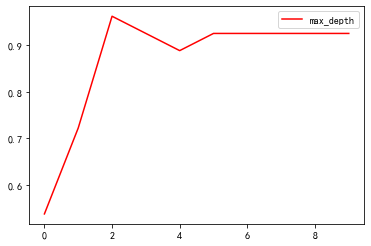

In [61]:
import matplotlib.pyplot as plt

test = []
for i in  range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1
                                     ,criterion = 'entropy'
                                     ,random_state = 30
                                     ,splitter = 'random'
                                    )
    clf = clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)
    test.append(score)
plt.plot(range(10),test,color='red',label='max_depth')
plt.legend()
plt.show()
    

思考：
1. 剪枝参数一定能够提升模型在测试集上的表现吗？调参没有绝对的答案，一切都是看数据本身。
2. 这么多参数要一个个看学习曲线？可以参考：调参矩阵

### 2.1.4 目标权重参数
**class_weight**  
样本标签平衡参数
**样本不平衡**
指数据集中，标签的一类占有很大的比例，这样会直接影响模型的学习，因此我们要使用class_weight对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模；该参数默认为none,此模式自动给数据集中所有标签同样的权重；

**min_weight_fraction_leaf**  
叶节点上必须达到的最小权重
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.


## 2.2 重要属性和接口
一个属性：   
**feature_inportances_**   
属性是在模型训练之后，能够调用
查看的模型的各种性质。对决策树来说，最重要的是feature_importances_,能共有查看各个特诊跟对模型的重要   性；  

四个接口：   
**fit()**   
**score()**   
**apply()**   
apply(测试集)返回每个测试样本所在的叶子结点的索引   
**predict()**   
predict（测试集）返回每个测试样本的标签

**关于维度**
特征只接受二维以上的矩阵输入，标签只接受一维的矩阵输入   
增维：reshape（1，-1）   
降维：ravel()

# 3 DecisionTreeRgressor  回归树
参数和属性几乎和分类树一样；   
在回归树中没有标签分类均衡的问题，所以没有class_weight这样的参数

## 3.1 重要参数、属性 、接口

**回归树质分枝量的的指标，有三种：**
1. mse 均方误差 mean squred error ,父节点和子节点之间的均方误差将被用来作为特征选择的标准，这种方法通过使用叶子结点的均值来最小化L2损失；   
   ·「N个点预测和真实的差平方平均值」（在sklearn中作了负数处理，均为负值）    
   · 在回归树中，mes不仅是分枝质量的衡量指标，还是衡量回归树质量的指标，当我们在使用交差验证，或其他方式获取回归树的结果的时候，我们往往选择mse作为衡量指标。这个指标对应在分类树中就是score代表的准确率；在回归树中，mse越小越好   
   · 然而回归树中score返回的是R^2，R^2是一个在1附近的数字
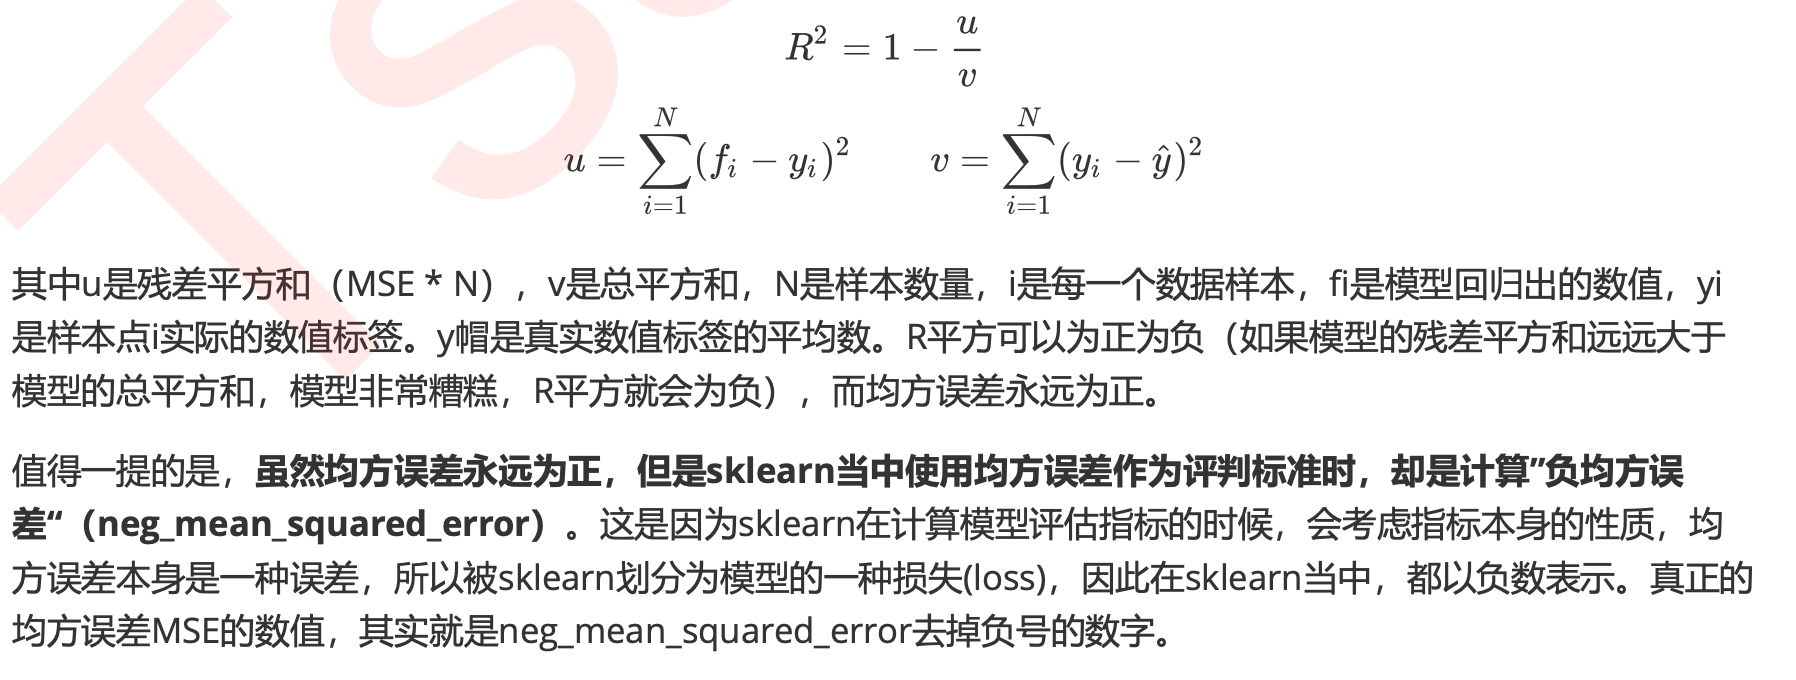
   
2. friedman_mse 费尔德曼均方误差（对潜在问题有改进）是否建议使用？？



3. mae 绝对平均误差 mean absolute error    

**回归树的重要属性和接口同分类树**

In [69]:
#简单看下回归树的运行
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection  import cross_val_score

boston = load_boston()

regressor = DecisionTreeRegressor(random_state =0)
a=cross_val_score(regressor,boston.data,boston.target,cv = 10,scoring = 'neg_mean_squared_error')

a.mean()

-33.91675098039215

**交叉验证 cross_var_score的用法**
用来抵消由于训练集和测试集的选取对模型稳定性造成的影响，将数据分为N份，每份数据轮流做测试集，其他所训练集，多次计算模型的精确性（平均值）来评估模型的平均准确度。
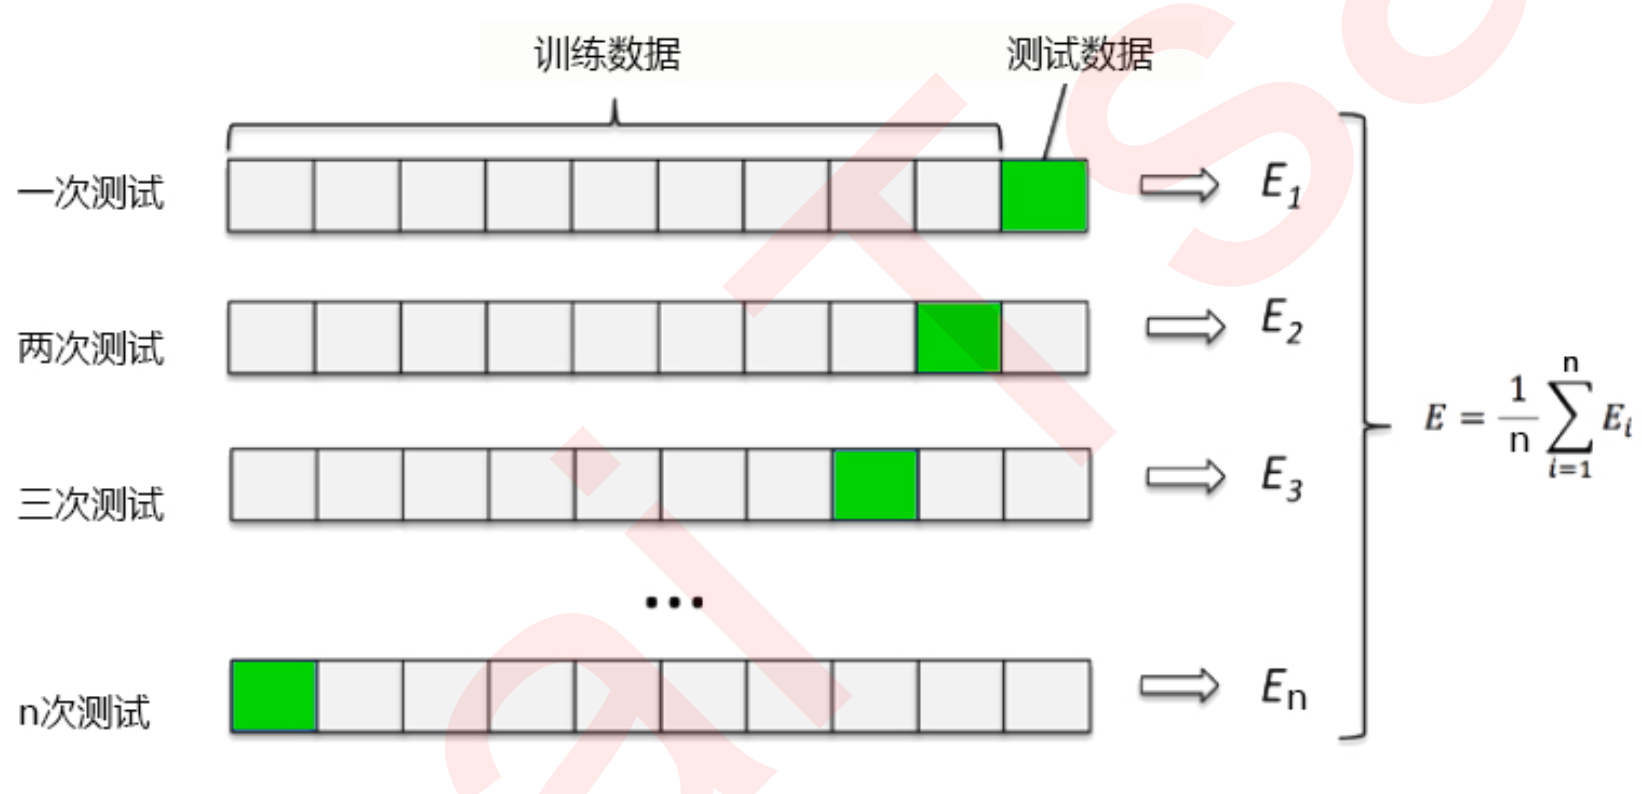

# 3.2 实例：一维回归图像绘制

## 1. 导入包 

In [86]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

## 2. 创建一条含有噪声的正弦曲线
在这一步，我们的基本思路是，先创建一组随机分布在0-5上的X取值，再基于sin函数生成对应的y坐标值，再创造一些噪声在y值上模拟真实的取样环境，全程我们基于numpy库来为我们生成这个数据集；

In [119]:
#确定随机种子
rng = np.random.RandomState(1)
#基于随机种子用rand生成0-5的X
x = np.sort(5*rng.rand(80,1))
#生成y
y = np.sin(x).ravel()#降维函数ravel，目标值必须为1维
#加入噪音
y[::5] += 3 *(0.5-rng.rand(16))


#np.random.rand(数组结构)生成随机数组的函数

#降维函数ravel()的用法
np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

(2,)

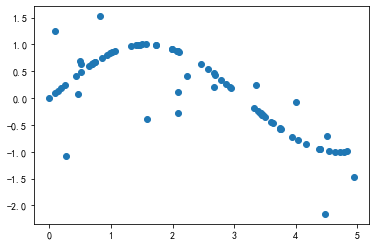

In [121]:
plt.figure()
plt.scatter(x,y)

## 3. 实例化&训练模型 

In [ ]:
regr_1= DecisionTreeRegressor(max_depth = 2)
regr_2= DecisionTreeRegressor(max_depth = 5)
regr_1=regr_1.fit(x,y)
regr_2=regr_2.fit(x,y)

## 4. 测试集导入模型，预测结果 

In [115]:
# X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]#增维切片
X_test = np.arange(0.0,5.0,0.01).reshape(-1,1)#增维函数
X_test = np.arange(0.0,5.0,0.01)[:, None]#耗时最少
X_test

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

## 5.绘制图像

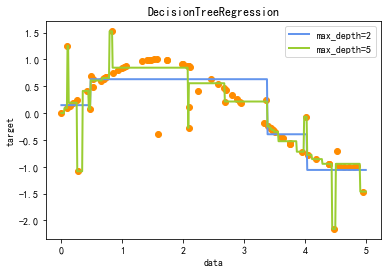

In [136]:
plt.figure()
plt.scatter(x,y,c='darkorange')
plt.plot(X_test,y_1,c='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y_2,c='yellowgreen',label='max_depth=5',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('DecisionTreeRegression')
plt.legend()
plt.show()


# 4. 实例：泰坦尼克号幸存者的预测

## 1. 导入所需的库 

In [306]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## 2. 导入数据集探索数据 

In [307]:
data = pd.read_csv(r'Titanic/train.csv') 
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [308]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [309]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. 对数据进行处理 

In [310]:
#和预测无关的特征初筛/缺失值过多初筛：name,ticket,cabin
data.drop(data[['Name','Ticket','Cabin']],inplace=True,axis=1)


#空值处理
    #较少-补全:年龄（均值补全）
data['Age']=data['Age'].fillna(data['Age'].mean())
    #较多-特征弃用：cabin
    #极少-drop空值：embarked
data=data.dropna()
data.info()

#分类变量数值类型转换
#性别处理01
data['Sex']=(data['Sex']=='male').astype('int')
#将三分类变量处理成数值型变量
labels=data['Embarked'].unique().tolist()
data['Embarked']=data['Embarked'].apply(lambda x:labels.index(x))
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


##  4. 提取标签和特征矩阵，分测试集和训练集

In [321]:
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)

#好习惯：修正索引
for i in (Xtrain,Xtest,Ytrain,Ytest):
    i.index = range(i.shape[0])

for i in(Ytrain,Ytest):
    i = i.values.ravel()

## 5. 导入模型，粗略跑一下查看结果 

In [324]:
clf = DecisionTreeClassifier(random_state =20)
clf = clf.fit(Xtrain,Ytrain)
score_ =clf.score(Xtest,Ytest)
score_

score = cross_val_score(clf,x,y,cv=10).mean()##注意较差验证这里是自动分集，所以直接输入x,y不用输入分好的训练组，测试组
score

0.7492211440245148

## 6.在不同max_depth下观察模型的拟合情况 

0.8166624106230849
0.8314606741573034


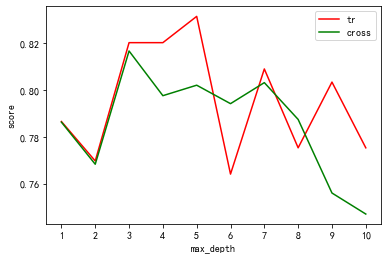

In [325]:
tr=[]
te=[]

for i in range(10):
    clf = DecisionTreeClassifier(random_state = 20
                                 ,max_depth = i+1
                                 ,criterion = 'entropy'
                                    )
    clf = clf.fit(Xtrain,Ytrain) 
    score_tr = clf.score(Xtest,Ytest)
    score_te = cross_val_score(clf,x,y,cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
print(max(tr))

plt.plot(range(1,11),tr,color = 'red',label= 'tr')
plt.plot(range(1,11),te,color = 'green',label ='cross')
plt.xticks(range(1,11))
plt.ylabel('score')
plt.xlabel('max_depth')

plt.legend()
plt.show()
    

无论是用train_test_split 还是cross_val_score都是max_depth=3的时候模型在测试集上拟合较好

## 7. 用网格搜索调整参数 

In [327]:
import numpy as np

parameters = {'splitter':('best','random')
              ,'criterion':('gini','entropy')
              ,'max_depth':[*range(1,10)]
              ,'min_samples_leaf':[*range(1,5,1)]
                ,'min_impurity_decrease':[*np.linspace(0.2,0.5,20)]
                }
clf = DecisionTreeClassifier()
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)
print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'entropy', 'max_depth': 1, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'splitter': 'best'}
0.7568857589984351


附：关于拆包 * 的用法

In [21]:
print(*[2, 3, 4])

2 3 4


In [53]:
print((2, 3, 4))

2 3 4


In [36]:
print(*zip([2, 3, 4],[2,3,4],[3,4,5]))

(2, 2, 3) (3, 3, 4) (4, 4, 5)


In [28]:
print(zip([2, 3, 4],[2,3,4]))

In [33]:
print(type(zip([2, 3, 4],[2,3,4])))

<class 'zip'>


In [41]:
[*[2, 3, 4]]


[2, 3, 4]

In [49]:
[*(2, 3, 4),[0,2]]

[2, 3, 4, [0, 2]]